In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BCO_DMO_data.csv")
print(df.head())
print(df.info())


                   time   depth                 Temperature       Salinity  \
0                   UTC       m  degrees Celsius ( \u00b0C)  dimensionless   
1  1988-10-20T22:30:00Z  2000.5                       3.817         34.993   
2  1988-10-20T22:30:00Z  2200.3                       3.577         34.982   
3  1988-10-20T22:30:00Z  2398.9                       3.317            NaN   
4  1988-10-20T22:30:00Z  2600.0                       3.127         34.957   

                            Oxygen_1                                CO2  \
0  micromoles per kilogram (umol/kg)  micromoles per kilogram (umol/kg)   
1                              255.5                                NaN   
2                              256.8                                NaN   
3                                NaN                                NaN   
4                              259.4                                NaN   

         Alkalinity                       NO3_plus_NO2  \
0  microequivalents  m

/tmp/ipython-input-441974859.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("BCO_DMO_data.csv")


In [8]:
#grabbing the head of the raw uncleaned BATS data
df.head(10).to_html("bats_dataset_head.html", index=False)

In [19]:
df_cleaning = df.copy()

/tmp/ipython-input-4064262334.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaning['time'] = pd.to_datetime(df_cleaning['time'], errors='coerce')


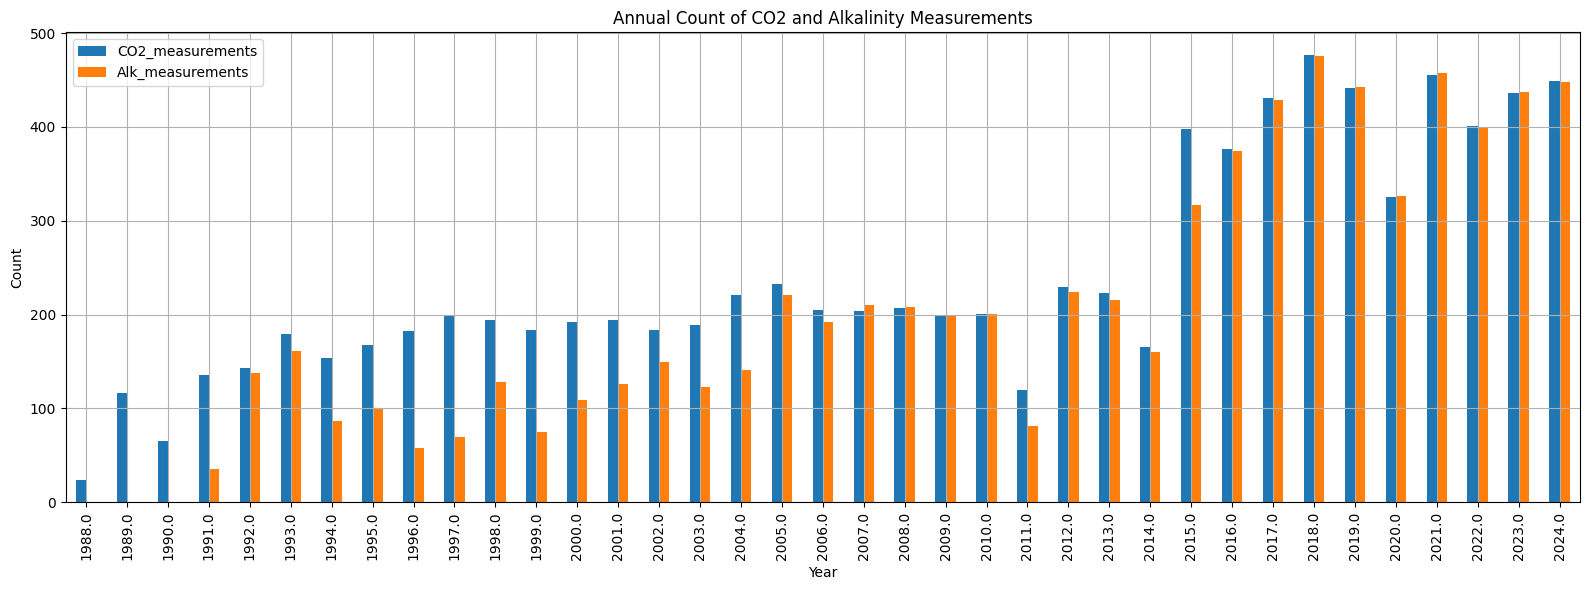

In [20]:
df_cleaning['time'] = pd.to_datetime(df_cleaning['time'], errors='coerce')
df_cleaning['year'] = df_cleaning['time'].dt.year
co2_counts = df_cleaning[df_cleaning['CO2'].notna()].groupby('year').size()
alk_counts = df_cleaning[df_cleaning['Alkalinity'].notna()].groupby('year').size()
data_chunks = pd.DataFrame({
    'CO2_measurements': co2_counts,
    "Alk_measurements": alk_counts
}).fillna(0)

data_chunks.plot(kind='bar', figsize=(16,6), title="Annual Count of CO2 and Alkalinity Measurements")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.savefig("eda_co2_alkalinity_by_year.png", dpi=300, bbox_inches='tight')

plt.show()

In [21]:
#Removing features with significantly fewer entries than exist for CO2 and Alkalinity
co2_count = df['CO2'].notna().sum()
alkalinity_count = df['Alkalinity'].notna().sum()

threshold = min(co2_count, alkalinity_count)
df_cleaning = df_cleaning.loc[:, df_cleaning.notna().sum() >= threshold]

df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73264 entries, 0 to 73263
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   time           73263 non-null  datetime64[ns, UTC]
 1   depth          73146 non-null  object             
 2   Temperature    73043 non-null  object             
 3   Salinity       17476 non-null  object             
 4   Oxygen_1       18579 non-null  object             
 5   CO2            8898 non-null   object             
 6   Alkalinity     7517 non-null   object             
 7   NO3_plus_NO2   18906 non-null  object             
 8   NO2            17767 non-null  object             
 9   PO4            18651 non-null  object             
 10  Silicate       18930 non-null  object             
 11  POC            9262 non-null   object             
 12  PON            9301 non-null   object             
 13  TOC            9452 non-null   object         

In [22]:
drop_columns = ['time_unitless', 'decimal_year', 'yyyymmdd']
df_cleaning = df_cleaning.drop(columns=drop_columns, errors='ignore')
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73264 entries, 0 to 73263
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   time          73263 non-null  datetime64[ns, UTC]
 1   depth         73146 non-null  object             
 2   Temperature   73043 non-null  object             
 3   Salinity      17476 non-null  object             
 4   Oxygen_1      18579 non-null  object             
 5   CO2           8898 non-null   object             
 6   Alkalinity    7517 non-null   object             
 7   NO3_plus_NO2  18906 non-null  object             
 8   NO2           17767 non-null  object             
 9   PO4           18651 non-null  object             
 10  Silicate      18930 non-null  object             
 11  POC           9262 non-null   object             
 12  PON           9301 non-null   object             
 13  TOC           9452 non-null   object             
 14  TN    

In [23]:
for col in df_cleaning.columns:
  if col != 'time':
    df_cleaning[col] = pd.to_numeric(df_cleaning[col], errors='coerce')



df_cleaning = df_cleaning.dropna(subset=['time'])
df_cleaning['year_month'] = df_cleaning['time'].dt.to_period('M')

monthly_df = df_cleaning.groupby('year_month').mean(numeric_only=True).reset_index()
monthly_df['year_month'] = monthly_df['year_month'].dt.to_timestamp()
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year_month    417 non-null    datetime64[ns]
 1   depth         417 non-null    float64       
 2   Temperature   417 non-null    float64       
 3   Salinity      415 non-null    float64       
 4   Oxygen_1      416 non-null    float64       
 5   CO2           405 non-null    float64       
 6   Alkalinity    369 non-null    float64       
 7   NO3_plus_NO2  415 non-null    float64       
 8   NO2           390 non-null    float64       
 9   PO4           415 non-null    float64       
 10  Silicate      414 non-null    float64       
 11  POC           410 non-null    float64       
 12  PON           410 non-null    float64       
 13  TOC           341 non-null    float64       
 14  TN            286 non-null    float64       
 15  Bact_Enum     411 non-null    float64   

/tmp/ipython-input-165348421.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cleaning['year_month'] = df_cleaning['time'].dt.to_period('M')


In [26]:
monthly_df.head()

,year_month,depth,Temperature,Salinity,Oxygen_1,CO2,Alkalinity,NO3_plus_NO2,NO2,PO4,Silicate,POC,PON,TOC,TN,Bact_Enum,year
0,1988-10-01,1642.583333,2.796167,35.782727,228.919048,2039.442857,NaN,1.860000,NaN,0.037273,1.222727,NaN,NaN,NaN,NaN,0.933333,1988.0
1,1988-11-01,1103.985417,13.222625,35.779353,221.023810,2042.577778,NaN,9.938621,NaN,0.576296,8.858000,26.850417,2.049167,NaN,NaN,0.612500,1988.0
2,1988-12-01,925.662712,14.116475,35.895206,205.154762,2054.125000,NaN,9.210952,NaN,0.522683,8.312143,17.359167,2.110833,NaN,NaN,NaN,1988.0
3,1989-01-01,809.389286,15.076196,35.966513,222.776744,2035.362500,NaN,8.638140,NaN,0.552093,8.044884,12.353214,1.982143,NaN,NaN,NaN,1989.0
4,1989-02-01,849.366102,14.175881,35.939711,227.468889,2036.008333,NaN,9.258222,NaN,0.584889,7.974222,35.155238,5.352381,NaN,NaN,NaN,1989.0


/tmp/ipython-input-1966251824.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1966251824.py:20: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig("co2_and_alkalinity_with_missing_calues.png", dpi=300, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


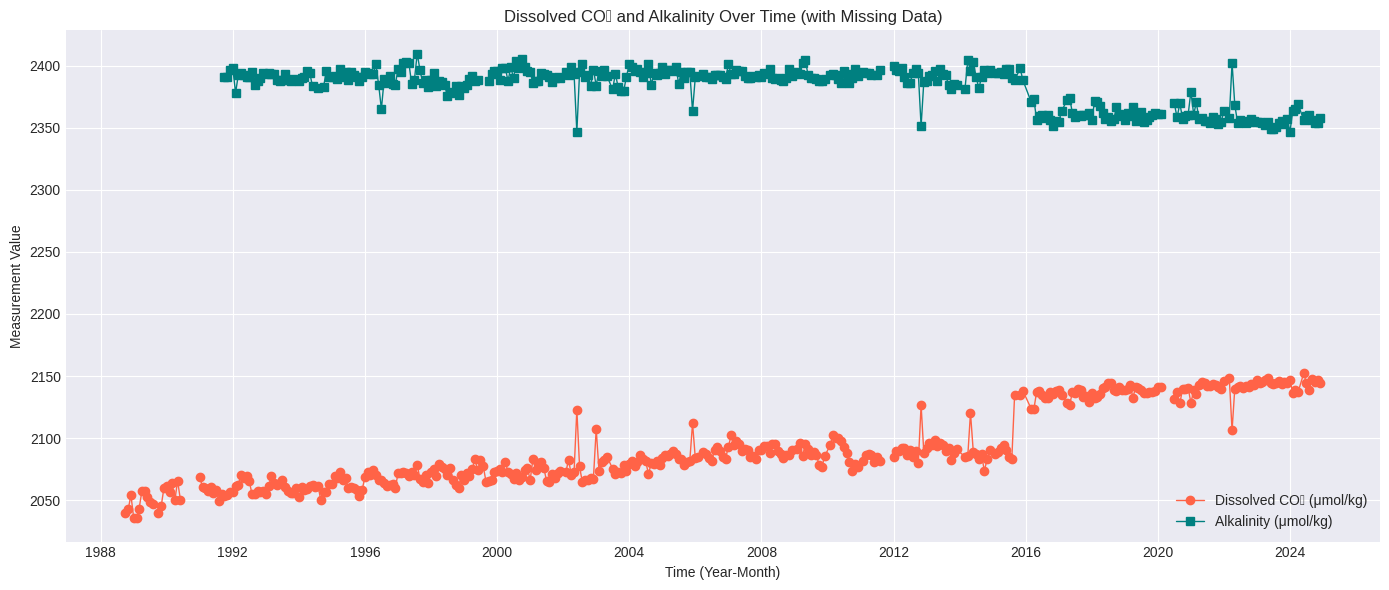

In [39]:
monthly_df['year_month'] = pd.to_datetime(monthly_df['year_month'])


plt.figure(figsize=(14, 6))
plt.style.use('seaborn-v0_8-darkgrid')


plt.plot(monthly_df['year_month'], monthly_df['CO2'], label='Dissolved CO₂ (μmol/kg)', color='tomato', marker='o', linestyle='-', linewidth=1)


plt.plot(monthly_df['year_month'], monthly_df['Alkalinity'], label='Alkalinity (μmol/kg)', color='teal', marker='s', linestyle='-', linewidth=1)


plt.xlabel('Time (Year-Month)')
plt.ylabel('Measurement Value')
plt.title('Dissolved CO₂ and Alkalinity Over Time (with Missing Data)')
plt.legend()
plt.tight_layout()

plt.savefig("co2_and_alkalinity_with_missing_calues.png", dpi=300, bbox_inches='tight')

plt.show()

In [33]:

monthly_df['year_month'] = pd.to_datetime(monthly_df['year_month'])
monthly_df = monthly_df.sort_values('year_month')


pre_2016 = monthly_df[monthly_df['year_month'] < '2016-01-01'].copy()
post_2016 = monthly_df[monthly_df['year_month'] >= '2016-01-01'].copy()


for df in [pre_2016, post_2016]:
    df['CO2'] = pd.to_numeric(df['CO2'], errors='coerce')
    df['Alkalinity'] = pd.to_numeric(df['Alkalinity'], errors='coerce')


pre_2016 = pre_2016.sort_values('year_month')
post_2016 = post_2016.sort_values('year_month')


pre_2016['CO2'] = pre_2016['CO2'].interpolate(method='linear', limit_direction='both')
pre_2016['Alkalinity'] = pre_2016['Alkalinity'].interpolate(method='linear', limit_direction='both')

post_2016['CO2'] = post_2016['CO2'].interpolate(method='linear', limit_direction='both')
post_2016['Alkalinity'] = post_2016['Alkalinity'].interpolate(method='linear', limit_direction='both')


monthly_df_imputed = pd.concat([pre_2016, post_2016]).sort_values('year_month').reset_index(drop=True)


print(monthly_df_imputed[['CO2', 'Alkalinity']].isna().sum())


CO2           0
Alkalinity    0
dtype: int64


/tmp/ipython-input-1263730355.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


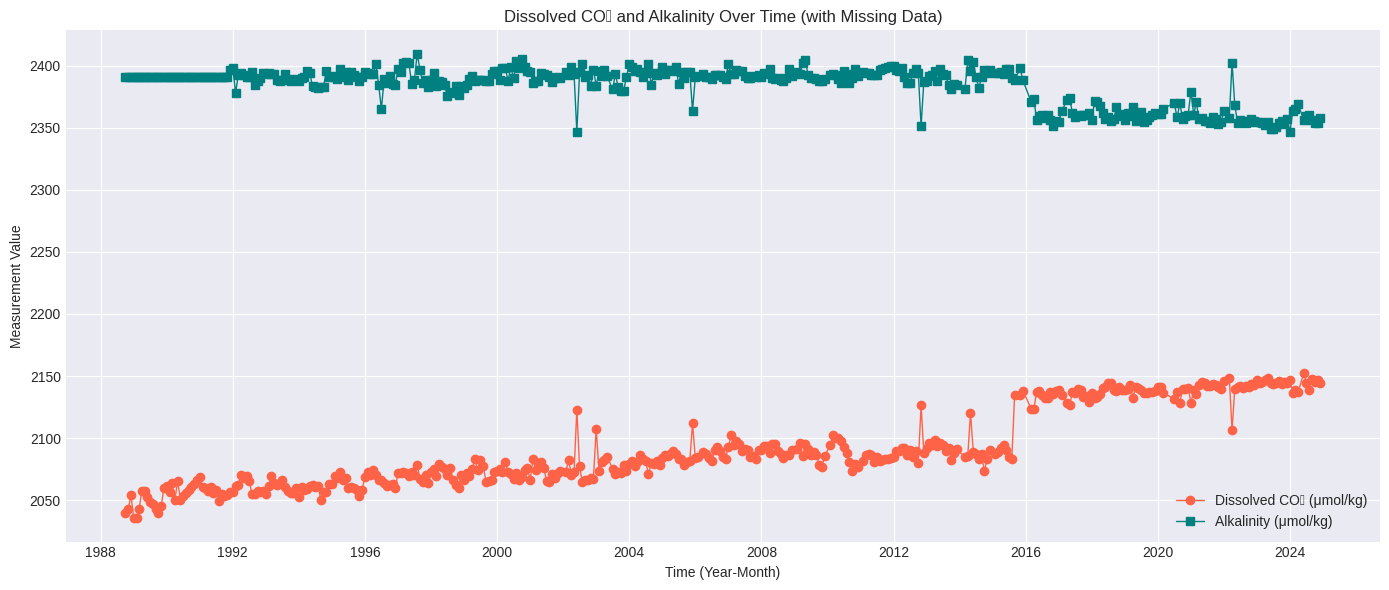

In [36]:
monthly_df_imputed['year_month'] = pd.to_datetime(monthly_df_imputed['year_month'])


plt.figure(figsize=(14, 6))
plt.style.use('seaborn-v0_8-darkgrid')


plt.plot(monthly_df_imputed['year_month'], monthly_df_imputed['CO2'], label='Dissolved CO₂ (μmol/kg)', color='tomato', marker='o', linestyle='-', linewidth=1)


plt.plot(monthly_df_imputed['year_month'], monthly_df_imputed['Alkalinity'], label='Alkalinity (μmol/kg)', color='teal', marker='s', linestyle='-', linewidth=1)


plt.xlabel('Time (Year-Month)')
plt.ylabel('Measurement Value')
plt.title('Dissolved CO₂ and Alkalinity Over Time (with Missing Data)')
plt.legend()
plt.tight_layout()


plt.show()

In [37]:
monthly_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year_month    417 non-null    datetime64[ns]
 1   depth         417 non-null    float64       
 2   Temperature   417 non-null    float64       
 3   Salinity      415 non-null    float64       
 4   Oxygen_1      416 non-null    float64       
 5   CO2           417 non-null    float64       
 6   Alkalinity    417 non-null    float64       
 7   NO3_plus_NO2  415 non-null    float64       
 8   NO2           390 non-null    float64       
 9   PO4           415 non-null    float64       
 10  Silicate      414 non-null    float64       
 11  POC           410 non-null    float64       
 12  PON           410 non-null    float64       
 13  TOC           341 non-null    float64       
 14  TN            286 non-null    float64       
 15  Bact_Enum     411 non-null    float64   

In [38]:
monthly_df_imputed = monthly_df_imputed.drop(columns=['TN'], errors='ignore')

monthly_df_imputed = monthly_df_imputed.fillna(method='ffill').fillna(method='bfill')

print(monthly_df_imputed.isna().sum())


year_month      0
depth           0
Temperature     0
Salinity        0
Oxygen_1        0
CO2             0
Alkalinity      0
NO3_plus_NO2    0
NO2             0
PO4             0
Silicate        0
POC             0
PON             0
TOC             0
Bact_Enum       0
year            0
dtype: int64


/tmp/ipython-input-1042206728.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_df_imputed = monthly_df_imputed.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-1042206728.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_df_imputed[numeric_cols] = monthly_df_imputed[numeric_cols].fillna(method='ffill').fillna(method='bfill')


In [42]:
monthly_df_imputed = monthly_df_imputed[monthly_df_imputed['year_month'] >= '1992-01-01']
monthly_df_imputed.head()

,year_month,depth,Temperature,Salinity,Oxygen_1,CO2,Alkalinity,NO3_plus_NO2,NO2,PO4,Silicate,POC,PON,TOC,Bact_Enum,year
39,1992-01-01,690.000000,15.565125,35.958723,225.854167,2056.258333,2398.263636,8.589375,0.083750,0.563542,8.352292,16.452188,3.523438,54.4,3.410000,1992.0
40,1992-02-01,585.584146,15.657915,35.998205,228.434091,2061.666667,2377.966667,8.487778,0.097381,0.556222,8.052222,13.292000,3.275000,54.4,3.951724,1992.0
41,1992-03-01,683.216667,15.043264,35.967208,227.029167,2062.550000,2392.100000,8.546596,0.036190,0.585745,8.768750,14.677188,3.524062,54.4,4.044444,1992.0
42,1992-04-01,606.393976,15.876349,36.027600,227.782222,2070.208333,2394.225000,8.256889,0.044889,0.525814,7.562000,19.444333,4.285667,54.4,4.230000,1992.0
43,1992-05-01,681.927778,15.662847,36.023271,228.402083,2068.016667,2392.408333,8.326667,0.008958,0.575000,7.776458,19.150000,4.015000,54.4,4.441667,1992.0


In [43]:
monthly_df_imputed.head(10).to_html("monthly_bats_dataset_head.html", index=False)

/tmp/ipython-input-3678899127.py:2: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3678899127.py:3: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig("co2_vs_alkalinity_scatter.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


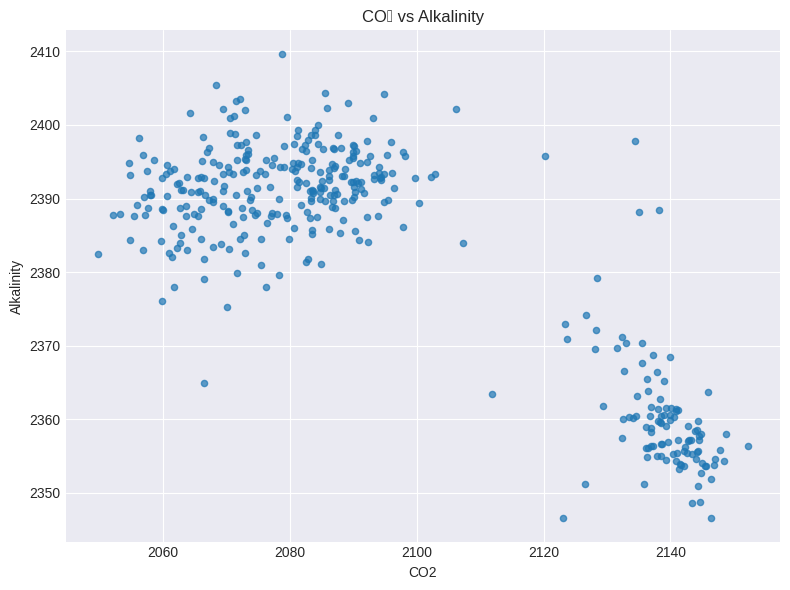

In [45]:
monthly_df_imputed.plot.scatter(x='CO2', y='Alkalinity', alpha=0.7, title="CO₂ vs Alkalinity", figsize=(8, 6))
plt.tight_layout()
plt.savefig("co2_vs_alkalinity_scatter.png")
plt.show()

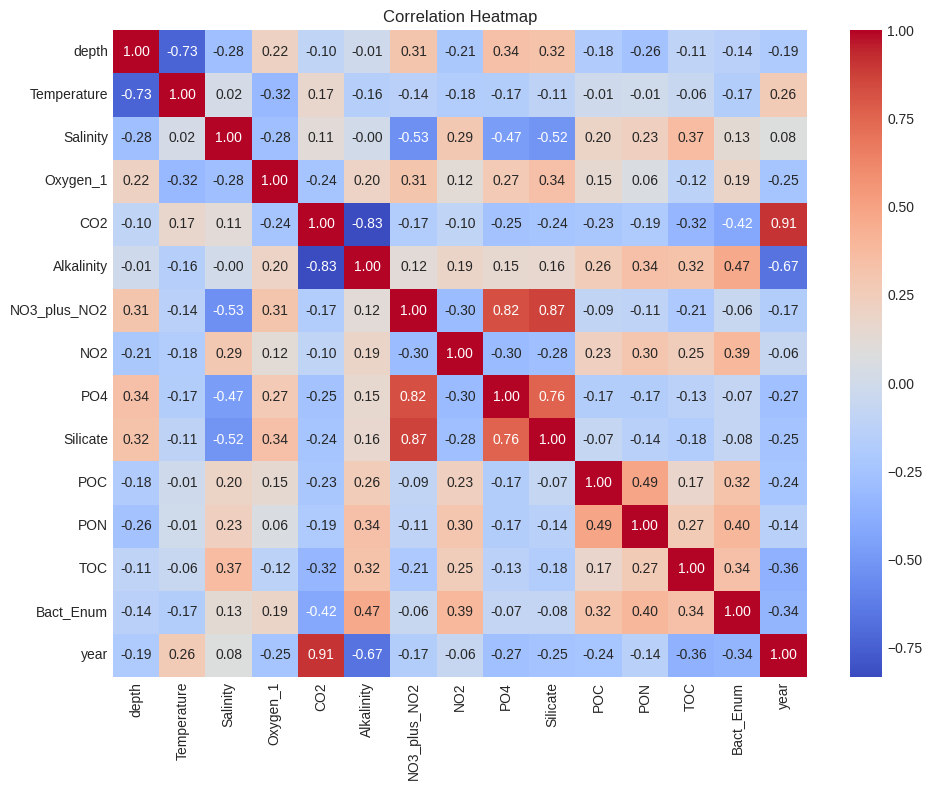

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_df_imputed.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

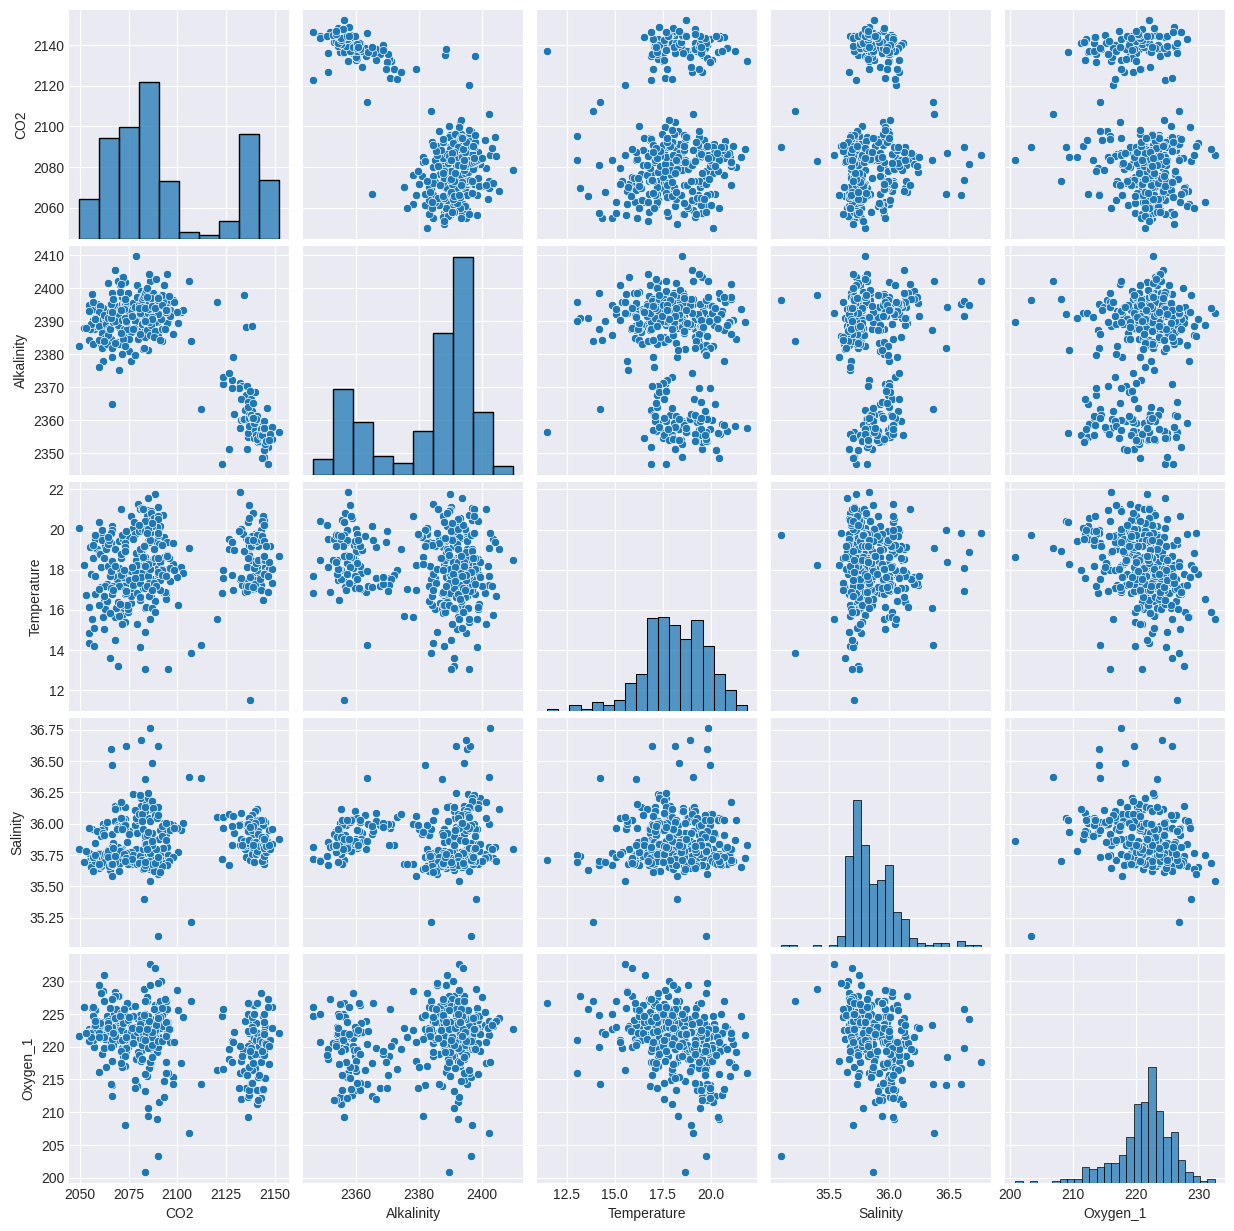

In [49]:
selected_cols = ['CO2', 'Alkalinity', 'Temperature', 'Salinity', 'Oxygen_1']
sns.pairplot(monthly_df_imputed[selected_cols].dropna())
plt.savefig("feature_pairplot.png")
plt.show()

/tmp/ipython-input-2165753639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_df_imputed['year_month'] = pd.to_datetime(monthly_df_imputed['year_month'])
/tmp/ipython-input-2165753639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_df_imputed['year'] = monthly_df_imputed['year_month'].dt.year
/tmp/ipython-input-2165753639.py:13: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2165753639.py:14: UserWarning: Glyp

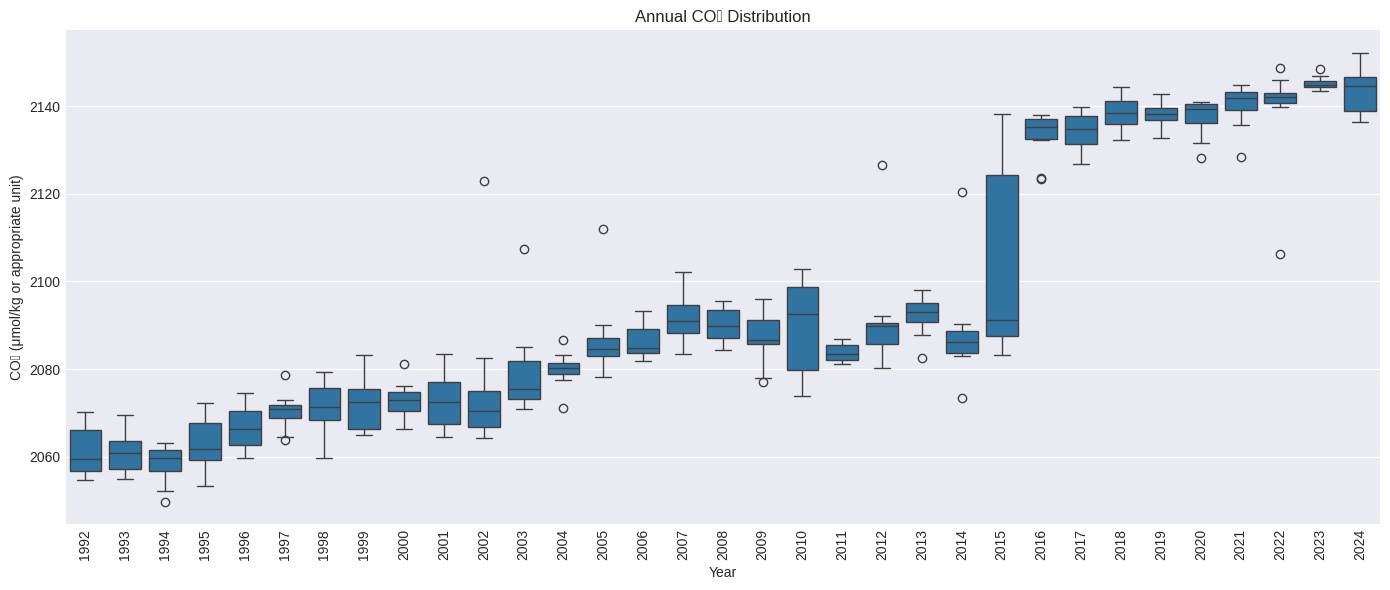

In [53]:
monthly_df_imputed['year_month'] = pd.to_datetime(monthly_df_imputed['year_month'])

# Create a new column 'year' from the 'time' column
monthly_df_imputed['year'] = monthly_df_imputed['year_month'].dt.year

# Now plot the boxplot using the new 'year' column
plt.figure(figsize=(14, 6))
sns.boxplot(data=monthly_df_imputed, x='year', y='CO2')
plt.xticks(rotation=90)
plt.title("Annual CO₂ Distribution")
plt.xlabel("Year")
plt.ylabel("CO₂ (μmol/kg or appropriate unit)")
plt.tight_layout()
plt.savefig("co2_annual_boxplot.png")
plt.show()

In [54]:
monthly_df_imputed.to_csv('monthly_average_BATS_cleaned.csv', index=False)